In [1]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Style plot
plt.style.use('bmh')

In [2]:
from fbref import BotScrap

## Principal module to extract data:

In [3]:
data = BotScrap()

## Select how to scrap it:

I want to collect all the important information about the single game.

In [4]:
match_stats = data.get_match('https://fbref.com/en/matches/c31f0a31/Athletic-Club-Real-Madrid-August-12-2023-La-Liga')

`match_stats` will have all the data from game, including `Match`, `Home`, `Away`, `Shots` and `Stats`.

## Let's do the XT Measure:
For this I have to use the shots and select all the important aspects of each player.

In [5]:
### Select teams
home_team = match_stats['Home']['Home']
away_team = match_stats['Away']['Away']

In [6]:
##
rows_shots = ['Player', 'Sh', 'xG', 'Pos', 'Min', 'Player ID']

# Home Team
home_shots = home_team['Summary'][rows_shots]
home_shots = home_shots[home_shots['Sh'] > 0]

# Away team
away_shots = away_team['Summary'][rows_shots]
away_shots = away_shots[away_shots['Sh'] > 0]

In [7]:
## Function to put the text to the side of the plot:
def text_plot(x, y, labels, color): 
    for x_val, y_val, name in zip(x, y, labels):
        plt.text(x_val + 0.07, y_val, name, fontsize=8, animated=True, ha='left', color=color, alpha=0.8)

The player that was much closer to make a Goal:  Vinicius Júnior


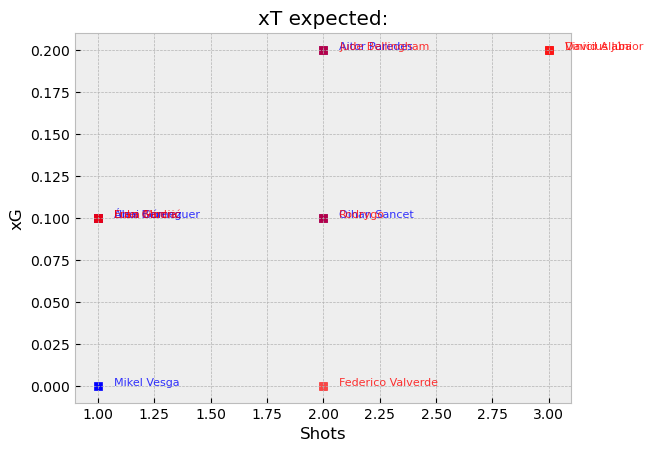

In [8]:
### Plot the data
# Home
plt.scatter(home_shots['Sh'].values, home_shots['xG'].values, color='blue', marker='s')
text_plot(home_shots['Sh'].values, home_shots['xG'].values, home_shots['Player'].values, 'blue')
#Away
plt.scatter(away_shots['Sh'].values, away_shots['xG'].values, color='red', marker='s', alpha=0.7)
text_plot(away_shots['Sh'].values, away_shots['xG'].values, away_shots['Player'].values, 'red')
##
plt.title('xT expected:')
plt.xlabel('Shots')
plt.ylabel('xG')
plt.grid(True)

## Player most close to make a goal
player_goal = pd.concat([home_shots[home_shots['xG'] == home_shots['xG'].max()], away_shots[away_shots['xG'] == away_shots['xG'].max()]])
player_goal = player_goal.sort_values(by=['Sh', 'xG'], ascending=False, ignore_index=True)
### Grab the one that has more shots
print('The player that was much closer to make a Goal: ', player_goal['Player'][0])

## Passes overall for CM: 
Here I will take the passes of the midfielders measured with the actual passes.

In [9]:
## shots Info
rows_passes = [('Unnamed: 0_level_0', 'Player'), ('Unnamed: 3_level_0', 'Pos'), ('Unnamed: 5_level_0', 'Min'), ('Total', 'Cmp'), ('Total', 'Att'), ('Total', 'Cmp%'), ('Unnamed: 27_level_0', 'PrgP'), ('Player ID', '')]

# Home passes
home_passes = home_team['Passing']
home_passes = home_passes.loc[:, rows_passes]
### Minutes: 
home_passes = home_passes[home_passes[('Unnamed: 5_level_0', 'Min')] >= 45]

# Away Passes
away_passes = away_team['Passing']
away_passes = away_passes.loc[:, rows_passes]
### Minutes:
away_passes = away_passes[away_passes[('Unnamed: 5_level_0', 'Min')] >= 45]

## Now it's time to filter the midfielders:

In [12]:
def contains_pos(cell_value, pos_list):
    if not pd.notna(cell_value):
        return False

    return any(pos in cell_value for pos in pos_list)

#### List of positions
pos_list = ['CM', 'LM', 'RM', 'DM', 'AM']

## Home
home_pos = home_passes['Unnamed: 3_level_0'].applymap(lambda cell_value: contains_pos(cell_value, pos_list))

## Away
away_pos = away_passes['Unnamed: 3_level_0'].applymap(lambda cell_value: contains_pos(cell_value, pos_list))

### Filter the teams
home_passes = home_passes[home_pos['Pos'] == True]
away_passes = away_passes[away_pos['Pos'] == True]

away_passes

Unnamed: 0_level_0 Unnamed: 3_level_0 Unnamed: 5_level_0 Total            \
                Player                Pos                Min   Cmp Att  Cmp%   
4      Jude Bellingham                 AM                 90    40  50  80.0   
5    Eduardo Camavinga                 LM                 70    50  56  89.3   
7    Federico Valverde                 RM                 90    42  51  82.4   
8  Aurélien Tchouaméni                 DM                 90    52  55  94.5   

  Unnamed: 27_level_0 Player ID  
                 PrgP            
4                   6  57d88cf9  
5                   5  7b9c2d84  
7                   6  0959c2a2  
8                  11  4f255115

# Shots 